In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree

In [29]:
df = pd.read_csv('./work/viikko8/datasets/titanic.csv')

X = df.iloc[:, 0:3]
y = df.iloc[:, [3]]
columns = X.columns

print(columns)

Index(['PClass', 'Age', 'Gender'], dtype='object')


In [12]:
# dummies
X_org = X
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), ['PClass', 'Gender'])], remainder='passthrough')
X = ct.fit_transform(X)

In [13]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
# Training the Decision Tree Classification model
model = tree.DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(X_train, y_train)

mfi = model.feature_importances_

In [15]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred_pros = model.predict_proba(X_test)

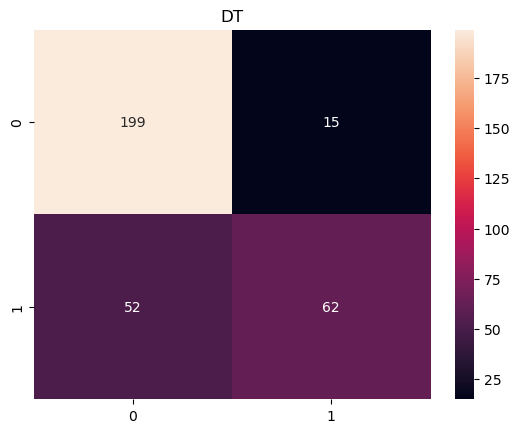

Accuracy score: 0.7957317073170732


In [16]:
# Making the Confusion Matrix and accuracy_score
cm = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_title("DT")
plt.show()

# Calculate accuracy score
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {score}")

In [27]:
# Create dot file for graphviz visualization
dot_data = export_graphviz(
            model,
            out_file =  None,
            feature_names = ct.transform(X),
            class_names = df['Survived'].unique(),
            filled = True,
            rounded = True)

graph = graphviz.Source(dot_data)
graph.render('./work/viikko8/titanic')

ValueError: Length of feature_names, 1312 does not match number of features, 4